In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations


# Yeni Bölüm

In [ ]:
df = pd.read_csv('/content/data_export_icin2.csv', sep=";")
print(df.head())
print(df.describe().T)
print(df.info())
print(df.isnull().sum())
print(df.isnull().sum().sum())
print(df.size)
print(df.shape)

   id  HbA1c  Hba1c_change  sex  age    LDL  Cholesterol   HDL  Creatinine  \
0   0   10.3      0.234952    1   61  118.0        203.0  55.0        0.71   
1   1    8.3      0.184793    2   65   92.0        189.0  63.0        1.01   
2   2    8.0      0.174650    2   52  107.2        180.0  48.0        1.37   
3   3    7.4     -0.073273    2   55   80.0        168.0  36.0        0.99   
4   4    5.9     -0.031106    1   53  171.0        251.0  58.0        0.77   

   Triglyceride  ...  insulin_reguler  linagliptin  metformin_hcl  nateglinid  \
0         149.0  ...              0.0          0.0           0.00         0.0   
1         253.0  ...              0.0          0.0           0.00         0.0   
2         124.0  ...              0.0          0.0           0.67         0.0   
3         261.0  ...              0.0          0.0           0.00         0.0   
4         112.0  ...              0.0          0.0           0.54         0.0   

   pioglitazon_hcl  repaglinide  saksaglipti

In [ ]:
df=df.drop(columns=["id"])

In [ ]:
#elimizdeki verideki featurları seçiyoruz
import statsmodels.api as sm
import pandas as pd

# Özelliklerin bulunduğu X ve hedef değişkeni y
X = df.drop(columns=["Glycemic_control"])
y = df["Glycemic_control"]

# Başlangıçta tüm özellikleri kullanıyoruz
X = sm.add_constant(X)  # Sabit terim (intercept) ekliyoruz

# Modeli kuruyoruz ve özellikleri çıkarma işlemine başlıyoruz
while True:
    model = sm.OLS(y, X).fit()  # Modeli fit ediyoruz
    max_p_value = max(model.pvalues)  # En yüksek p-değerini buluyoruz

    # Eğer en büyük p-değeri eşik değerinden küçükse, çıkarmaya devam ediyoruz
    if max_p_value > 0.01:  # Eşik değerini 0.01 olarak belirledik
        excluded_feature = model.pvalues.idxmax()  # En yüksek p-değerine sahip özelliği alıyoruz
        X = X.drop(columns=[excluded_feature])  # O özelliği çıkarıyoruz
        print(f"{excluded_feature} çıkarıldı")
    else:
        break
# Seçilen özellikleri elde ediyoruz
selected_features = X.columns.tolist()
selected_features.remove('const')
# Seçilen özellikleri orijinal DataFrame'e kaydediyoruz
df = df[selected_features]

# Yeni DataFrame'i kontrol ediyoruz
df.head()

gastro_oes_reflux çıkarıldı
mastoid_h60_h95 çıkarıldı
dermatologic_drugs çıkarıldı
cataract çıkarıldı
calcium_homeostasis_drugs çıkarıldı
musculoskeletal_dis çıkarıldı
digestive_sys_dis çıkarıldı
eye_other çıkarıldı
cardiomyopathies çıkarıldı
pregnancy çıkarıldı
cerebrovascular çıkarıldı
vaccines çıkarıldı
hematologic_dis çıkarıldı
immunostimulants çıkarıldı
sex_hormones çıkarıldı
age çıkarıldı
respiratory_sys çıkarıldı
respiratory_sys_drugs çıkarıldı
oral_dis çıkarıldı
anxiolytics çıkarıldı
bipolar_affective_dis çıkarıldı
various_drugs çıkarıldı
antiparasitic çıkarıldı
Malign_neoplasms çıkarıldı
neoplasms_unknown çıkarıldı
anxiety_dis çıkarıldı
musculosceletal_drugs çıkarıldı
endocrin_drugs çıkarıldı
Creatinine çıkarıldı
antineoplastics çıkarıldı
Other_mental_dis çıkarıldı
antiepileptics çıkarıldı
depression çıkarıldı
anemia çıkarıldı
nephropaties çıkarıldı
anesthetics çıkarıldı
lipoprotein_met_dis çıkarıldı
systemic_hormones çıkarıldı
antiinfectives çıkarıldı
other_digestive çıkarıld

,HbA1c,Hba1c_change,sex,LDL,HDL,Obesity,Thyroid_dis,vitamin_deficiency,diabetic_nueropathy,nervous_sys_dis,...,insulin_lispro,insulin_nph,insulin_reguler,linagliptin,nateglinid,pioglitazon_hcl,repaglinide,saksagliptin,sitagliptin,vildagliptin
0,10.3,0.234952,1,118.0,55.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.0
1,8.3,0.184793,2,92.0,63.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,0.174650,2,107.2,48.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.7,0.0,0.0,0.0
3,7.4,-0.073273,2,80.0,36.0,0,0,1,0,0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.9,-0.031106,1,171.0,58.0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df.columns)

Index(['HbA1c', 'Hba1c_change', 'sex', 'LDL', 'HDL', 'Obesity', 'Thyroid_dis',
       'vitamin_deficiency', 'diabetic_nueropathy', 'nervous_sys_dis',
       'retinopathy', 'refraction_dis', 'ischemic_heart_dis',
       'other_circulatory', 'dyspepsia', 'skin_dis', 'kidney_failure',
       'other_genitourinary', 'ceserian_multiple', 'digestive_drugs',
       'lipid_modifying', 'gynecologic_drugs', 'glucagon', 'antipsychotics',
       'pshycoanaleptics', 'other_nervous_drugs', 'akarboz', 'dapagliflozin',
       'eksenatid', 'gliklazid', 'glimepirid', 'insulin_aspart',
       'insulin_detemir', 'insulin_glarjin', 'insulin_glusilin',
       'insulin_lispro', 'insulin_nph', 'insulin_reguler', 'linagliptin',
       'nateglinid', 'pioglitazon_hcl', 'repaglinide', 'saksagliptin',
       'sitagliptin', 'vildagliptin'],
      dtype='object')


In [ ]:
#targetımızla ilgili olmayan featurları drop ediyoruz
df = df.drop(columns=['sex', 'Obesity', 'Thyroid_dis', 'vitamin_deficiency',
                      'diabetic_nueropathy', 'nervous_sys_dis', 'retinopathy',
                      'refraction_dis', 'ischemic_heart_dis', 'other_circulatory',
                      'dyspepsia', 'skin_dis', 'kidney_failure', 'other_genitourinary',
                      'ceserian_multiple', 'digestive_drugs', 'lipid_modifying',
                      'gynecologic_drugs', 'glucagon', 'antipsychotics', 'pshycoanaleptics',
                      'other_nervous_drugs'])


In [ ]:
print(df.columns)

Index(['HbA1c', 'Hba1c_change', 'LDL', 'HDL', 'akarboz', 'dapagliflozin',
       'eksenatid', 'gliklazid', 'glimepirid', 'insulin_aspart',
       'insulin_detemir', 'insulin_glarjin', 'insulin_glusilin',
       'insulin_lispro', 'insulin_nph', 'insulin_reguler', 'linagliptin',
       'nateglinid', 'pioglitazon_hcl', 'repaglinide', 'saksagliptin',
       'sitagliptin', 'vildagliptin'],
      dtype='object')


In [ ]:
df.shape

(77724, 23)

In [ ]:
#yeni featurlar ekliyoruz
df['average_insulin_dosage'] = (df['insulin_aspart'] + df['insulin_detemir'] + df['insulin_glarjin'] + df['insulin_glusilin'] +
                               df['insulin_lispro'] + df['insulin_nph'] + df['insulin_reguler']) / 7
df['LDL_to_HDL'] = df['LDL'] / df['HDL']
df['HbA1c_percent_change'] = df['Hba1c_change'] / df['HbA1c']
df['insulin_resistance_score'] = df['Hba1c_change'] * df['HbA1c']
df['diabetes_risk_score'] = df['HbA1c'] * df['LDL'] / df['HDL']
df['polypharmacy_score'] = (df['akarboz'] + df['dapagliflozin'] + df['eksenatid'] + df['gliklazid'] + df['glimepirid'] +
                           df['insulin_aspart'] +df['insulin_detemir'] + df['insulin_glarjin'] + df['insulin_glusilin'] +
                           df['insulin_lispro'] + df['insulin_nph'] + df['insulin_reguler'] + df['linagliptin'] +
                           df['nateglinid'] + df['pioglitazon_hcl'] + df['repaglinide'] + df['saksagliptin'] +
                           df['sitagliptin'] + df['vildagliptin'])

In [ ]:
print(df.columns)

Index(['HbA1c', 'Hba1c_change', 'LDL', 'HDL', 'akarboz', 'dapagliflozin',
       'eksenatid', 'gliklazid', 'glimepirid', 'insulin_aspart',
       'insulin_detemir', 'insulin_glarjin', 'insulin_glusilin',
       'insulin_lispro', 'insulin_nph', 'insulin_reguler', 'linagliptin',
       'nateglinid', 'pioglitazon_hcl', 'repaglinide', 'saksagliptin',
       'sitagliptin', 'vildagliptin', 'average_insulin_dosage', 'LDL_to_HDL',
       'HbA1c_percent_change', 'insulin_resistance_score',
       'diabetes_risk_score', 'polypharmacy_score'],
      dtype='object')


In [ ]:
df.shape

(77724, 29)

In [ ]:
df.isnull().sum().sum()

0

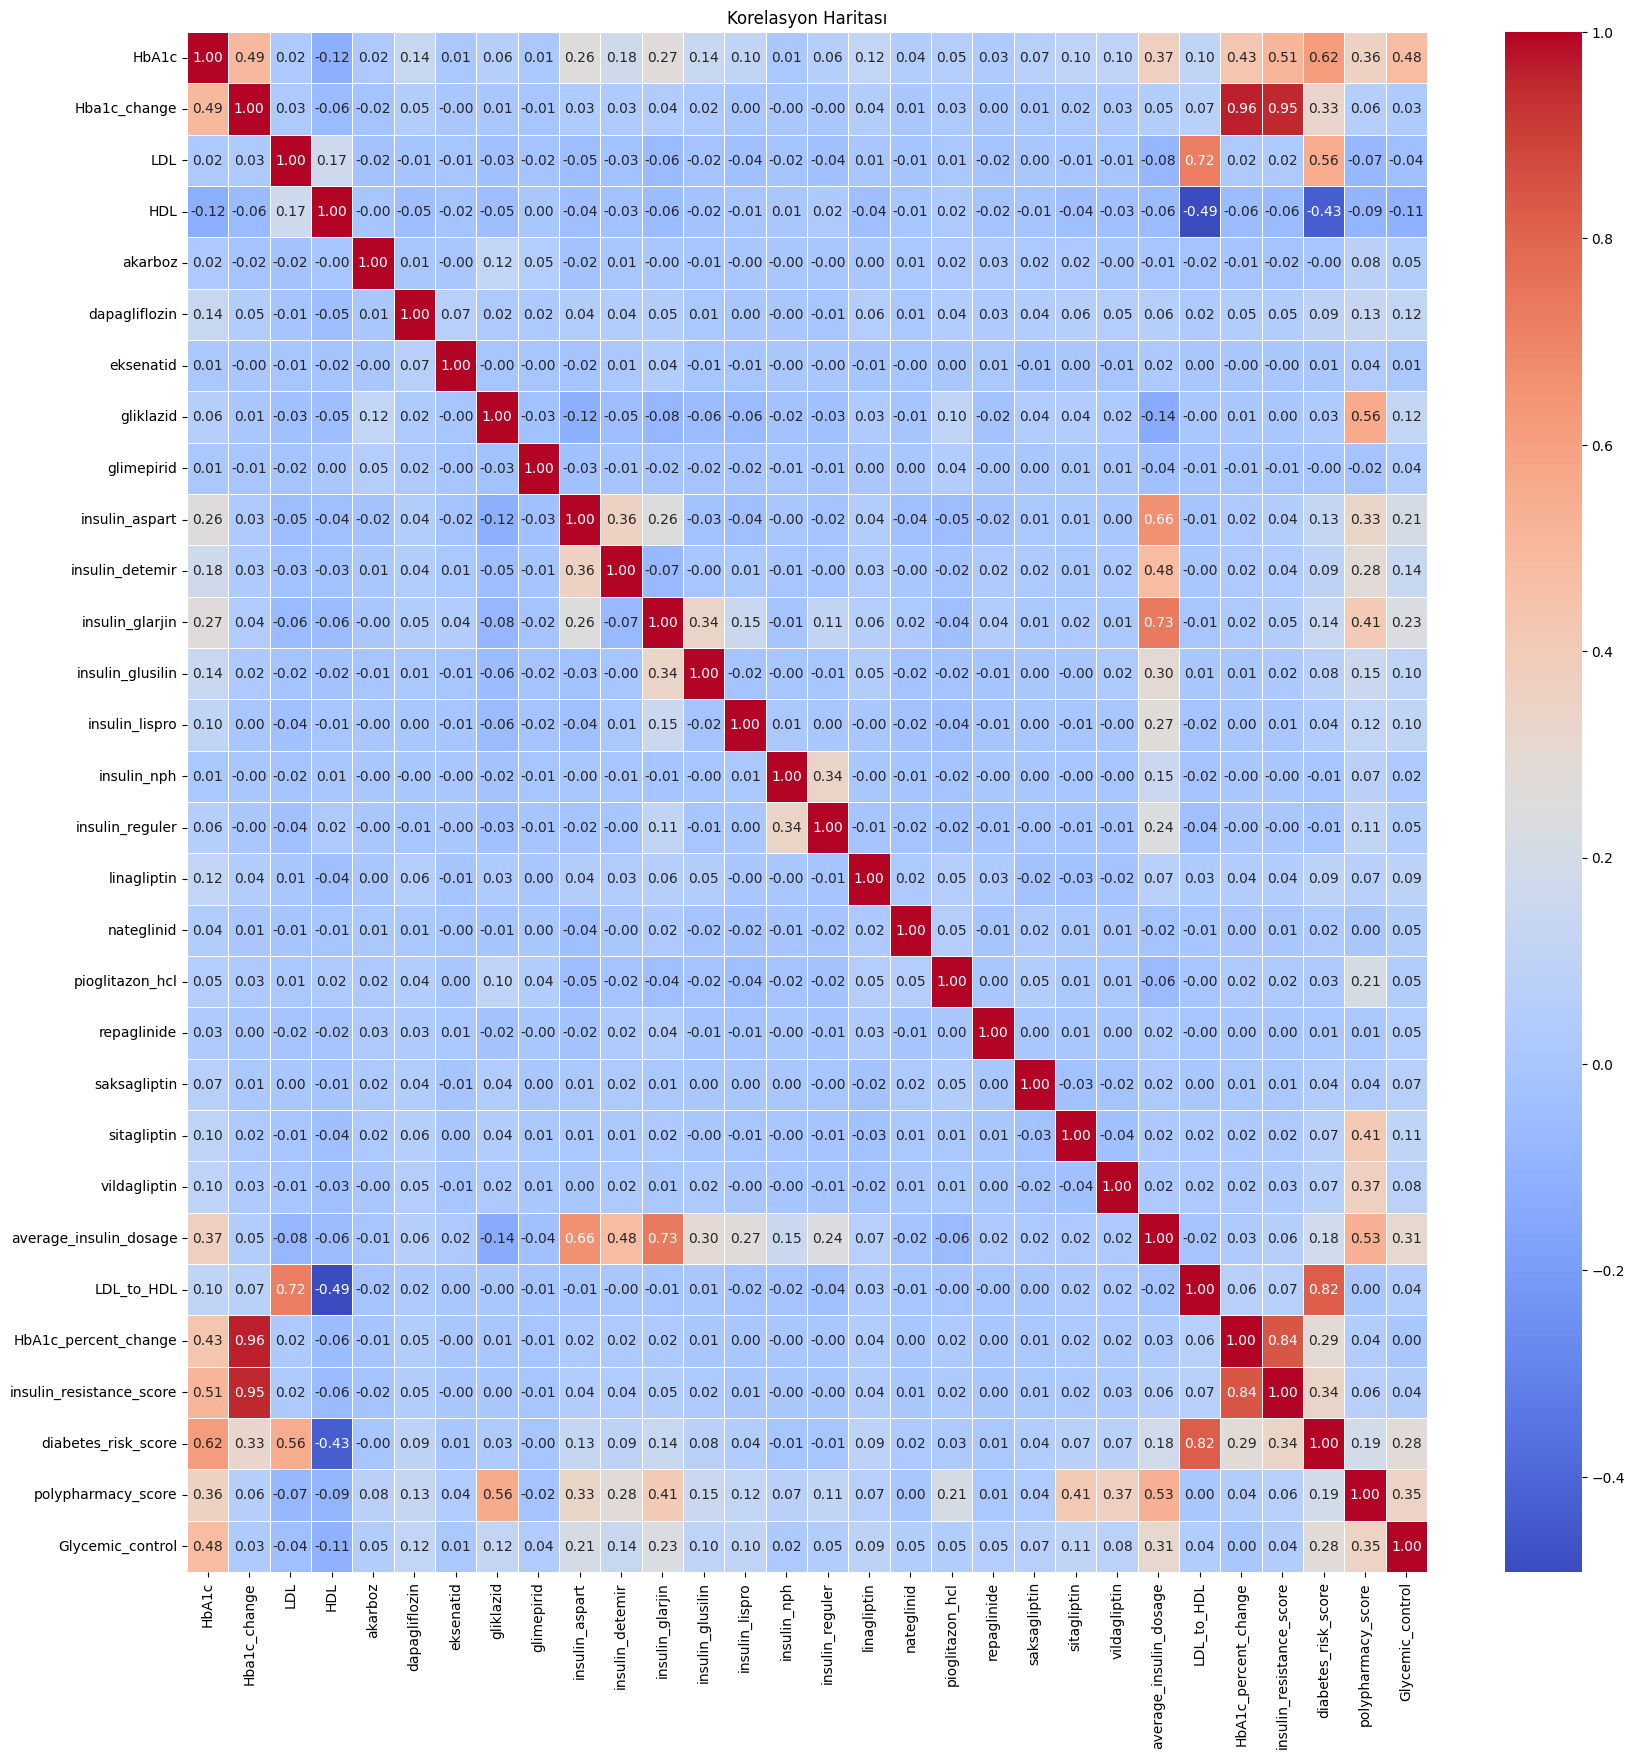

In [ ]:
#featurların kendi aralarında ve sınıfla korealasyonunu gösteren heatmap
df['Glycemic_control'] = y
numeric_columns = df.select_dtypes(include=['float',"int"]).columns

# Sayısal sütunlar arasındaki korelasyonu hesaplama
correlation_matrix = df[numeric_columns].corr()

# Korelasyon haritasını oluşturma
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasyon Haritası")
plt.show()

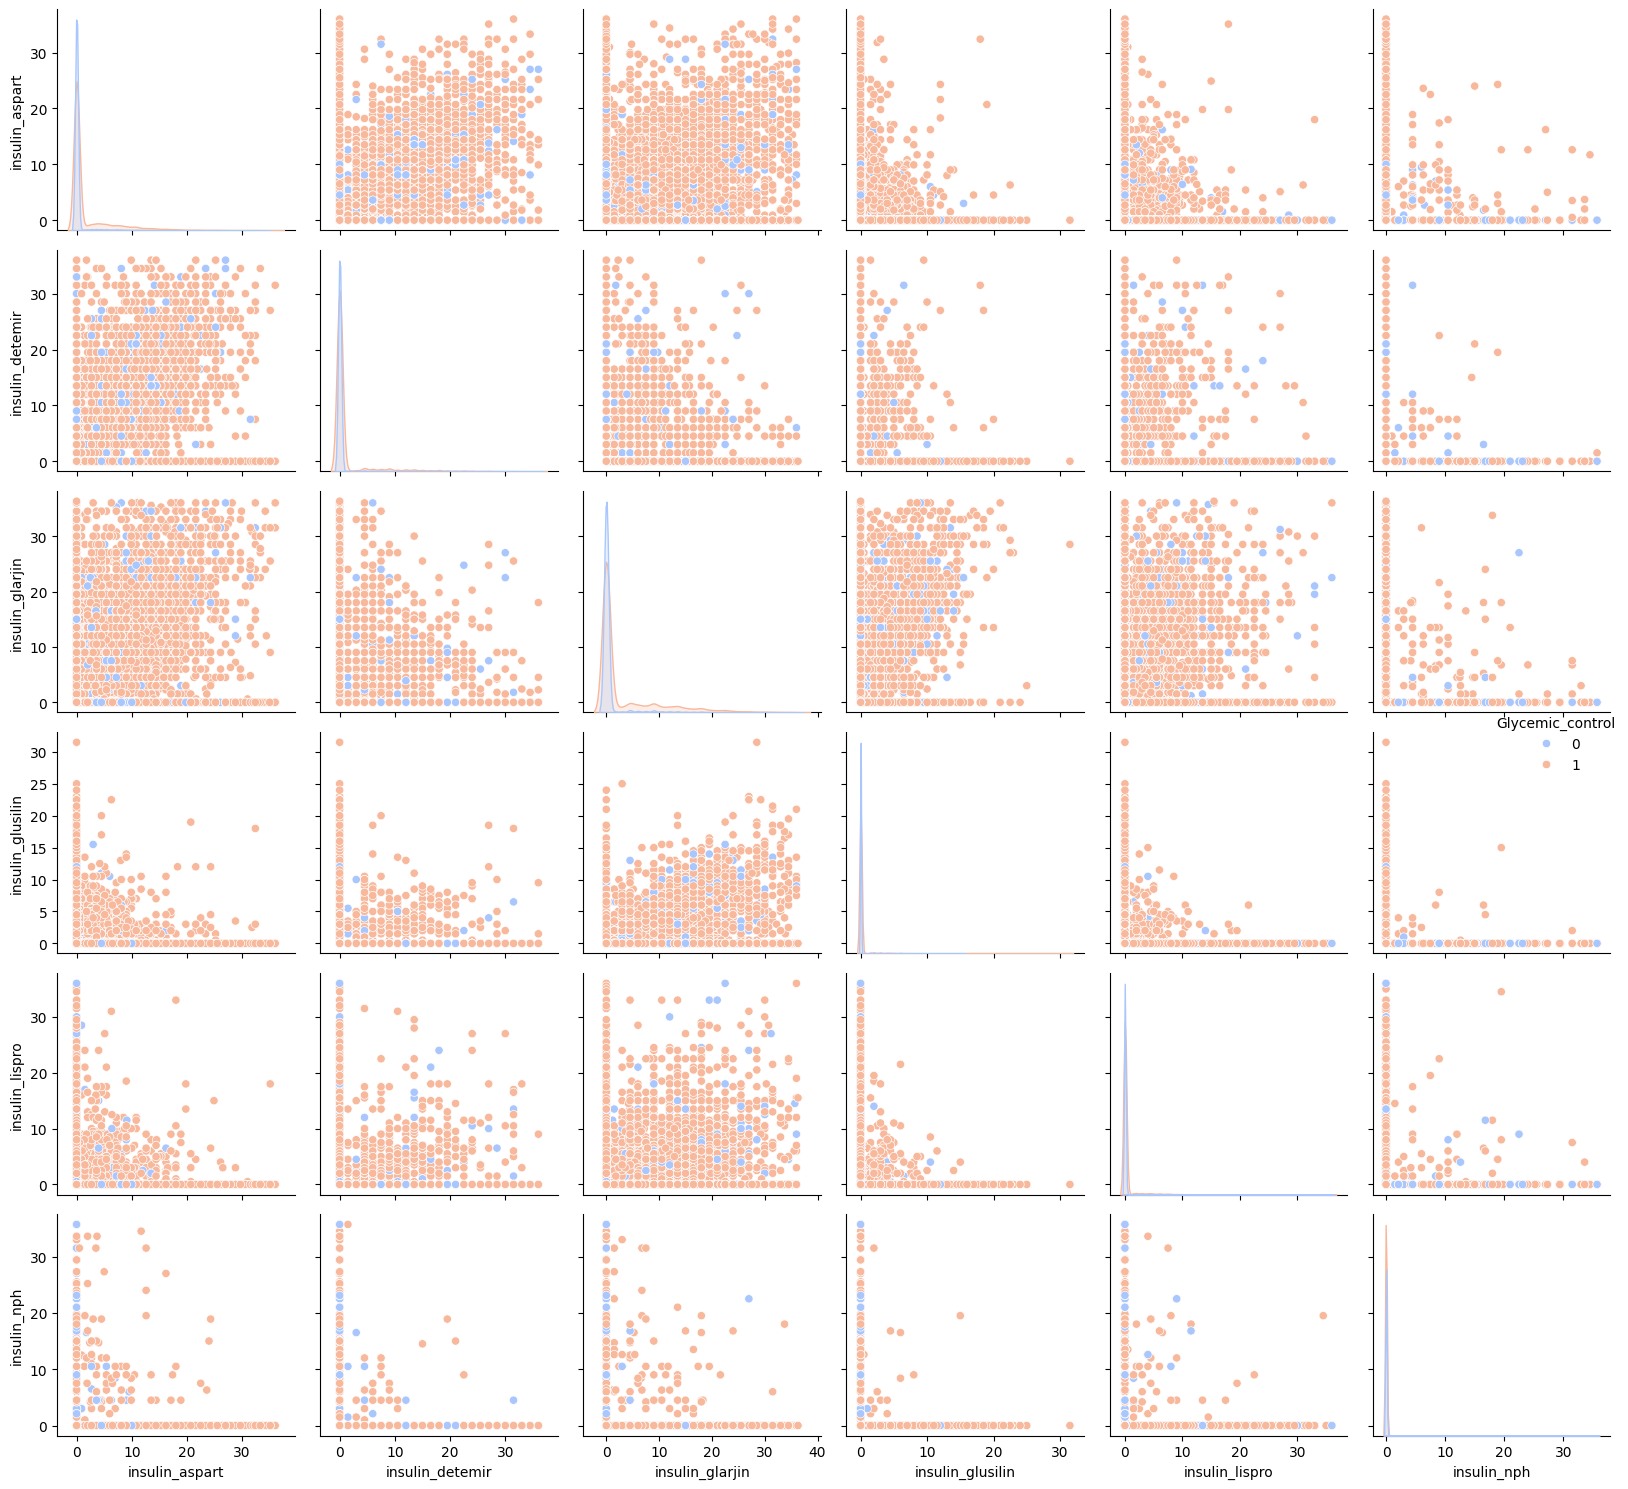

In [ ]:
#seçilen bazı sütunlar ile grafiksel görselleştirme yapıyoruz
columns_to_plot = ['insulin_aspart',
       'insulin_detemir', 'insulin_glarjin', 'insulin_glusilin',
       'insulin_lispro','insulin_nph', 'Glycemic_control']


sns.pairplot(df[columns_to_plot], hue='Glycemic_control', diag_kind='kde', palette='coolwarm', corner=False)


plt.tight_layout()
plt.show()

In [ ]:
df.shape

(77724, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77724 entries, 0 to 77723
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HbA1c                     77724 non-null  float64
 1   Hba1c_change              77724 non-null  float64
 2   LDL                       77724 non-null  float64
 3   HDL                       77724 non-null  float64
 4   akarboz                   77724 non-null  float64
 5   dapagliflozin             77724 non-null  float64
 6   eksenatid                 77724 non-null  float64
 7   gliklazid                 77724 non-null  float64
 8   glimepirid                77724 non-null  float64
 9   insulin_aspart            77724 non-null  float64
 10  insulin_detemir           77724 non-null  float64
 11  insulin_glarjin           77724 non-null  float64
 12  insulin_glusilin          77724 non-null  float64
 13  insulin_lispro            77724 non-null  float64
 14  insuli

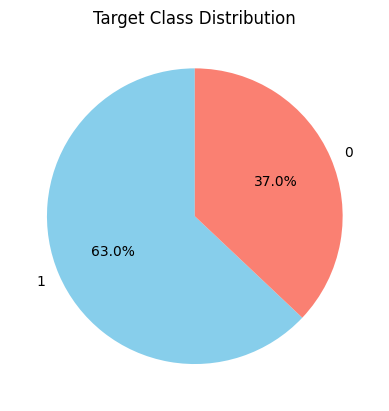

In [ ]:
#sınıfımızın dağılımına bakıyoruz
class_counts = y.value_counts()

# Pasta grafiği oluşturuyoruz
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=class_counts.index, colors=['skyblue', 'salmon'])
plt.title('Target Class Distribution')
plt.ylabel('')
plt.show()
#çıkan pasta grafiğe göre sınıfımızda 1 ler çoğunlukta

In [ ]:
X=df.drop(columns=["Glycemic_control"])
y=df["Glycemic_control"]

In [ ]:
#1 leri dengelemek için smote ile yeni gözlemler oluşturuyoruz
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


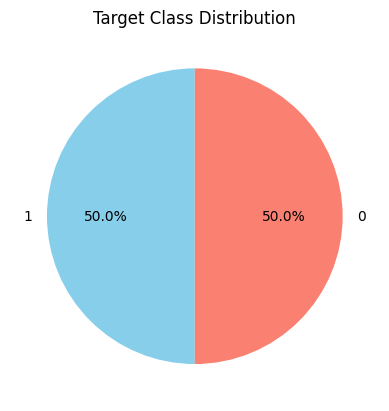

In [ ]:
#pasta grafiğimize göre sınfımız dengelenmiş
class_counts = y_resampled.value_counts()

# Pasta grafiği oluştur
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=class_counts.index, colors=['skyblue', 'salmon'])
plt.title('Target Class Distribution')
plt.ylabel('')
plt.show()

In [ ]:
df.shape

(77724, 30)

In [ ]:

for col in df.columns:
    print(f"Values for column: {col}")
    print(df[col].sort_values().unique())
    print("\n")

Values for column: HbA1c
[ 3.8   4.    4.1  ... 21.28 22.5  38.36]


Values for column: Hba1c_change
[-3.99624774 -2.896513   -2.61272651 ...  4.52241452  5.46622677
  7.30820461]


Values for column: LDL
[ 10.   10.4  10.6 ... 342.8 343.  349. ]


Values for column: HDL
[ 12.   12.6  13.  ... 181.  187.  192. ]


Values for column: akarboz
[0.     0.0015 0.003  0.0045 0.006  0.0075 0.009  0.0105 0.012  0.0135
 0.015  0.0165 0.018  0.0195 0.021  0.0225 0.024  0.027  0.0285 0.03
 0.0315 0.033  0.0345 0.036  0.0375 0.039  0.0405 0.042  0.0435 0.045
 0.0465 0.048  0.0495 0.051  0.0525 0.054  0.0555 0.057  0.0585 0.06
 0.0615 0.063  0.0645 0.066  0.0675 0.069  0.0705 0.072  0.0735 0.075
 0.0765 0.078  0.081  0.0825 0.084  0.0855 0.087  0.0885 0.09   0.0915
 0.093  0.0945 0.096  0.0975 0.099  0.1005 0.102  0.1035 0.105  0.1065
 0.108  0.111  0.1125 0.114  0.117  0.12   0.1215 0.123  0.1245 0.126
 0.1275 0.129  0.1305 0.132  0.1335 0.135  0.1395 0.141  0.144  0.1485
 0.153  0.162  0.171  0.1

In [ ]:
#minmax scaler ile değerleri normalize ediyoruz
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X_resampled)
#veri setimizi test ve train olacak şekilde bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled,
                                                    test_size=0.30,
                                                    random_state=42)

CAT MODELİ

Learning rate set to 0.062631
0:	learn: 0.6533759	total: 63.1ms	remaining: 1m 3s
1:	learn: 0.6208591	total: 114ms	remaining: 57.1s
2:	learn: 0.5920831	total: 176ms	remaining: 58.5s
3:	learn: 0.5683185	total: 244ms	remaining: 1m
4:	learn: 0.5476071	total: 306ms	remaining: 1m
5:	learn: 0.5295898	total: 342ms	remaining: 56.7s
6:	learn: 0.5153273	total: 380ms	remaining: 54s
7:	learn: 0.5027429	total: 450ms	remaining: 55.8s
8:	learn: 0.4918799	total: 522ms	remaining: 57.5s
9:	learn: 0.4814600	total: 595ms	remaining: 58.9s
10:	learn: 0.4744111	total: 658ms	remaining: 59.2s
11:	learn: 0.4666592	total: 727ms	remaining: 59.8s
12:	learn: 0.4594988	total: 794ms	remaining: 1m
13:	learn: 0.4542020	total: 875ms	remaining: 1m 1s
14:	learn: 0.4480989	total: 941ms	remaining: 1m 1s
15:	learn: 0.4431073	total: 1s	remaining: 1m 1s
16:	learn: 0.4386948	total: 1.04s	remaining: 1m
17:	learn: 0.4345680	total: 1.09s	remaining: 59.3s
18:	learn: 0.4312767	total: 1.12s	remaining: 58s
19:	learn: 0.4282499	total: 1

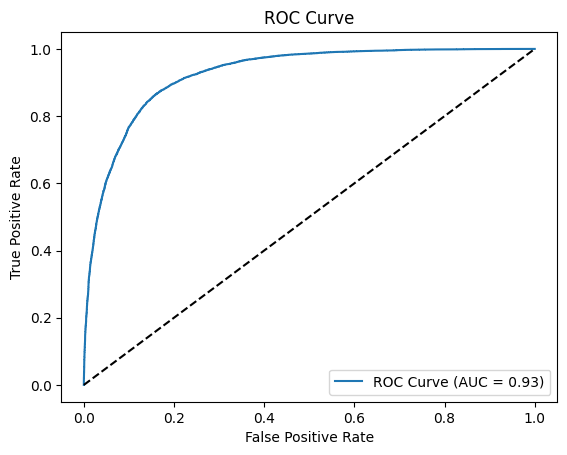

Cohen's Kappa Score: 0.7041907161392131


In [ ]:

!pip install catboost
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier().fit(X_train, y_train)
# Test verisi üzerinde tahminler yapma
y_pred = cat_model.predict(X_test)
# Modelin doğru ve yanlış sınıflandırmalarını gösterir
print(confusion_matrix(y_test, y_pred))
# Precision, recall, F1 skoru ve destek değerlerini içerir
print(classification_report(y_test, y_pred))
# Doğruluk (accuracy) hesaplama
accuracy_cat = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_cat)
# F1 skoru hesaplama
f1_cat = f1_score(y_test, y_pred)
print("F1 Score:", f1_cat)
# Kesinlik (precision) hesaplama
precision_cat = precision_score(y_test, y_pred)
print("Precision:", precision_cat)
# Duyarlılık (recall) hesaplama
recall_cat = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_cat)
# ROC AUC Score
# ROC AUC, modelin sınıflandırma başarısını 0 ile 1 arasında değerlendirir
roc_auc = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
#eğriye baktığımıda sola yakın bu demektirki modelimizin performansı güzel
fpr, tpr, thresholds = roc_curve(y_test, cat_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
# Cohen's Kappa, modelin sınıflandırma başarısını değerlendirir. 1'e yakın değerler iyi performansı gösterir.
kappa_cat = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_cat)


CAT MODEL TUNİNG

In [ ]:
#gridsearch ile tuning yapıyoruz anlamlı bir artış gözlemlenmiyor
catb = CatBoostClassifier()
catb_params = {
    'iterations': [500, 1000],
    'learning_rate': [ 0.03, 0.1],
    'depth': [6, 10],
    'l2_leaf_reg': [3, 5],
    'border_count': [32,64], }
grid_search=GridSearchCV(catb, param_grid=catb_params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train,y_train)
catbBest_model=grid_search.best_estimator_
catbBest_params=grid_search.best_params_
catbBest_score=grid_search.best_score_

print("best model:",catbBest_model)
print("best params:",catbBest_params)
print("best score:",catbBest_score)

y_pred=catbBest_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_cattuning = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_cattuning)
f1_cattuning = f1_score(y_test, y_pred)
print("F1 Score:", f1_cattuning)
precision_cattuning = precision_score(y_test, y_pred)
print("Precision:", precision_cattuning)
recall_cattuning = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_cattuning)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, catbBest_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, catbBest_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_cattuning = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_cattuning)


MLP

[[11810  2835]
 [ 2480 12235]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     14645
           1       0.81      0.83      0.82     14715

    accuracy                           0.82     29360
   macro avg       0.82      0.82      0.82     29360
weighted avg       0.82      0.82      0.82     29360

Accuracy: 0.8189713896457765
F1 Score: 0.8215544737283867
Precision: 0.811877903118779
Sensitivity (Recall): 0.8314644920149508
ROC AUC Score: 0.8984172220870722


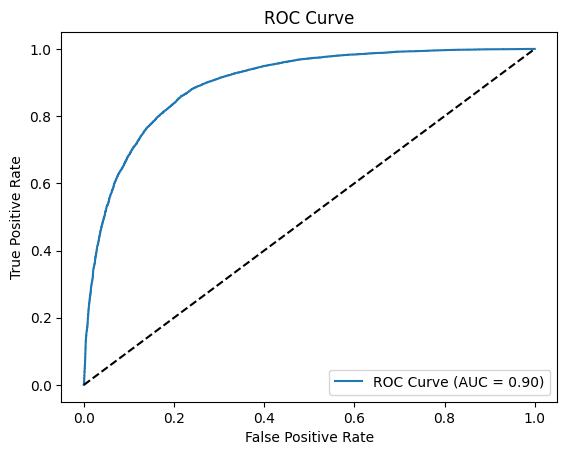

Cohen's Kappa Score: 0.6379198450035095


In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(X_train, y_train)
y_pred = mlpc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_mlpc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_mlpc)
f1_mlpc = f1_score(y_test, y_pred)
print("F1 Score:", f1_mlpc)
precision_mlpc = precision_score(y_test, y_pred)
print("Precision:", precision_mlpc)
recall_mlpc = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_mlpc)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, mlpc.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
#eğri sola yatık iyi performansa işaret
fpr, tpr, thresholds = roc_curve(y_test, mlpc.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_mlpc = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_mlpc)

MLP TUNİNG

In [ ]:
mlpc = MLPClassifier()
mlpc_params = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.01],
    'learning_rate_init': [0.0001, 0.01],
    'max_iter': [200, 500],
    }
grid_search=GridSearchCV(mlpc, param_grid=mlpc_params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train,y_train)
mlpcBest_model=grid_search.best_estimator_
mlpcBest_params=grid_search.best_params_
mlpcBest_score=grid_search.best_score_

print("best model:",mlpcBest_model)
print("best params:",mlpcBest_params)
print("best score:",mlpcBest_score)

y_pred=mlpcBest_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_mlpctuning = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_mlpctuning)
f1_mlpctuning = f1_score(y_test, y_pred)
print("F1 Score:", f1_mlpctuning)
precision_mlpctuning = precision_score(y_test, y_pred)
print("Precision:", precision_mlpctuning)
recall_mlpctuning = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_mlpctuning)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, mlpcBest_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, mlpcBest_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_mlpctuning = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_mlpctuning)


GBM MODELİ

[[11828  2817]
 [ 2232 12483]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82     14645
           1       0.82      0.85      0.83     14715

    accuracy                           0.83     29360
   macro avg       0.83      0.83      0.83     29360
weighted avg       0.83      0.83      0.83     29360

Accuracy: 0.8280313351498637
F1 Score: 0.831784107946027
Precision: 0.8158823529411765
Sensitivity (Recall): 0.8483180428134557
ROC AUC Score: 0.9063625685567608


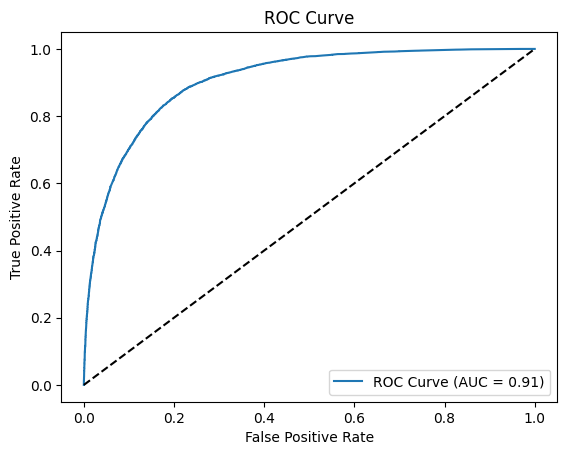

Cohen's Kappa Score: 0.6560280340652318


In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_gbm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_gbm)
f1_gbm = f1_score(y_test, y_pred)
print("F1 Score:", f1_gbm)
precision_gbm = precision_score(y_test, y_pred)
print("Precision:", precision_gbm)
recall_gbm = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_gbm)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, gbm_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_gbm = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_gbm)


GBM TUNİNG

In [ ]:
gbm = GradientBoostingClassifier()
gbm_params = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 10],
}
grid_search=GridSearchCV(gbm, param_grid=gbm_params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train,y_train)
gbmBest_model=grid_search.best_estimator_
gbmBest_params=grid_search.best_params_
gbmBest_score=grid_search.best_score_

print("best model:",gbmBest_model)
print("best params:",gbmBest_params)
print("best score:",gbmBest_score)

y_pred=gbmBest_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_gbmtuning = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_gbmtuning)
f1_gbmtuning = f1_score(y_test, y_pred)
print("F1 Score:", f1_gbmtuning)
precision_gbmtuning = precision_score(y_test, y_pred)
print("Precision:", precision_gbmtuning)
recall_gbmtuning = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_gbmtuning)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, gbmBest_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, gbmBest_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_gbmtuning = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_gbmtuning)

XGB MODELİ

[[12094  2551]
 [ 2035 12680]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     14645
           1       0.83      0.86      0.85     14715

    accuracy                           0.84     29360
   macro avg       0.84      0.84      0.84     29360
weighted avg       0.84      0.84      0.84     29360

Accuracy: 0.8438010899182561
F1 Score: 0.8468576771522073
Precision: 0.8325126386973934
Sensitivity (Recall): 0.8617057424396873
ROC AUC Score: 0.9192647766305683


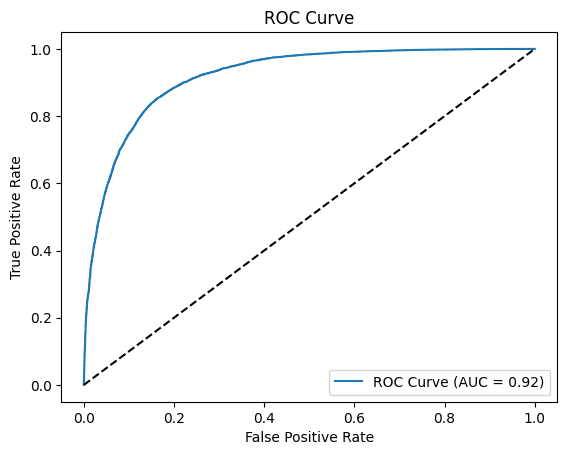

Cohen's Kappa Score: 0.6875742213026761


In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb)
f1_xgb = f1_score(y_test, y_pred)
print("F1 Score:", f1_xgb)
precision_xgb = precision_score(y_test, y_pred)
print("Precision:", precision_xgb)
recall_xgb = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_xgb)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_xgb = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_xgb)


XGB TUNİNG

In [ ]:
xgb = XGBClassifier()
xgb_params = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 10],
    'colsample_bytree': [0.6, 1.0],
    'reg_lambda': [1, 10],
    'subsample': [0.6, 1.0],
    }
grid_search=GridSearchCV(xgb, param_grid=xgb_params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train,y_train)
xgbBest_model=grid_search.best_estimator_
xgbBest_params=grid_search.best_params_
xgbBest_score=grid_search.best_score_

print("best model:",xgbBest_model)
print("best params:",xgbBest_params)
print("best score:",xgbBest_score)

y_pred=xgbBest_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_xgbtuning = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgbtuning)
f1_xgbtuning = f1_score(y_test, y_pred)
print("F1 Score:", f1_xgbtuning)
precision_xgbtuning = precision_score(y_test, y_pred)
print("Precision:", precision_xgbtuning)
recall_xgbtuning = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_xgbtuning)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, xgbBest_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, xgbBest_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_xgbtuning = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_xgbtuning)

EXTC MODELİ

[[12114  2531]
 [ 1990 12725]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     14645
           1       0.83      0.86      0.85     14715

    accuracy                           0.85     29360
   macro avg       0.85      0.85      0.85     29360
weighted avg       0.85      0.85      0.85     29360

Accuracy: 0.8460149863760218
F1 Score: 0.8491541823762971
Precision: 0.8340980597797588
Sensitivity (Recall): 0.8647638464152225
ROC AUC Score: 0.9201793424096179


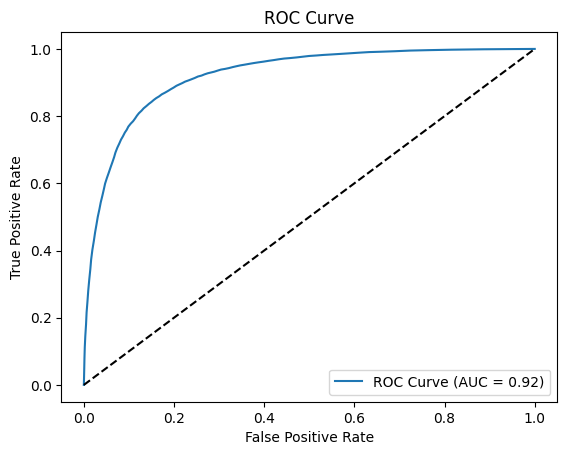

Cohen's Kappa Score: 0.6920011598171617


In [ ]:
extc_model = ExtraTreesClassifier().fit(X_train, y_train)
y_pred = extc_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_extc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_extc)
f1_extc = f1_score(y_test, y_pred)
print("F1 Score:", f1_extc)
precision_extc = precision_score(y_test, y_pred)
print("Precision:", precision_extc)
recall_extc = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_extc)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, extc_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, extc_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_extc = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_extc)

EXTC TUNİNG

In [ ]:
extc = ExtraTreesClassifier()
extc_params = {
    'n_estimators': [100, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 10],
}
grid_search=GridSearchCV(extc, param_grid=extc_params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train,y_train)
extcBest_model=grid_search.best_estimator_
extcBest_params=grid_search.best_params_
extcBest_score=grid_search.best_score_

print("best model:",extcBest_model)
print("best params:",extcBest_params)
print("best score:",extcBest_score)

y_pred=extcBest_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_extctuning = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_extctuning)
f1_extctuning = f1_score(y_test, y_pred)
print("F1 Score:", f1_extctuning)
precision_extctuning = precision_score(y_test, y_pred)
print("Precision:", precision_extctuning)
recall_extctuning = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", recall_extctuning)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, extcBest_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, extcBest_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Cohen's Kappa
kappa_extctuning = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa_extctuning)

In [ ]:
while True:
    HbA1c = float(input("HbA1c: "))
    Hba1c_change = float(input("Hba1c change: "))
    LDL = float(input("LDL: "))
    HDL = float(input("HDL: "))
    akarboz = float(input("Akarboz: "))
    dapagliflozin = float(input("Dapagliflozin: "))
    eksenatid = float(input("Eksenatid: "))
    gliklazid = float(input("Gliklazid: "))
    glimepirid = float(input("Glimepirid: "))
    insulin_aspart = float(input("Insulin Aspart: "))
    insulin_detemir = float(input("Insulin Detemir: "))
    insulin_glarjin = float(input("Insulin Glarjin: "))
    insulin_glusilin = float(input("Insulin Glusilin: "))
    insulin_lispro = float(input("Insulin Lispro: "))
    insulin_nph = float(input("Insulin NPH: "))
    insulin_reguler = float(input("Insulin Reguler: "))
    linagliptin = float(input("Linagliptin: "))
    nateglinid = float(input("Nateglinid: "))
    pioglitazon_hcl = float(input("Pioglitazon HCL: "))
    repaglinide = float(input("Repaglinide: "))
    saksagliptin = float(input("Saksagliptin: "))
    sitagliptin = float(input("Sitagliptin: "))
    vildagliptin = float(input("Vildagliptin: "))
    average_insulin_dosage = float(input("Average Insulin Dosage: "))
    LDL_to_HDL = float(input("LDL to HDL: "))
    HbA1c_percent_change = float(input("HbA1c Percent Change: "))
    insulin_resistance_score = float(input("Insulin Resistance Score: "))
    diabetes_risk_score = float(input("Diabetes Risk Score: "))
    polypharmacy_score = float(input("Polypharmacy Score: "))

    kullanici_veri = pd.DataFrame({
        'HbA1c': [HbA1c],
        'Hba1c_change': [Hba1c_change],
        'LDL': [LDL],
        'HDL': [HDL],
        'akarboz': [akarboz],
        'dapagliflozin': [dapagliflozin],
        'eksenatid': [eksenatid],
        'gliklazid': [gliklazid],
        'glimepirid': [glimepirid],
        'insulin_aspart': [insulin_aspart],
        'insulin_detemir': [insulin_detemir],
        'insulin_glarjin': [insulin_glarjin],
        'insulin_glusilin': [insulin_glusilin],
        'insulin_lispro': [insulin_lispro],
        'insulin_nph': [insulin_nph],
        'insulin_reguler': [insulin_reguler],
        'linagliptin': [linagliptin],
        'nateglinid': [nateglinid],
        'pioglitazon_hcl': [pioglitazon_hcl],
        'repaglinide': [repaglinide],
        'saksagliptin': [saksagliptin],
        'sitagliptin': [sitagliptin],
        'vildagliptin': [vildagliptin],
        'average_insulin_dosage': [average_insulin_dosage],
        'LDL_to_HDL': [LDL_to_HDL],
        'HbA1c_percent_change': [HbA1c_percent_change],
        'insulin_resistance_score': [insulin_resistance_score],
        'diabetes_risk_score': [diabetes_risk_score],
        'polypharmacy_score': [polypharmacy_score]
    })

    break

HbA1c: 5.7
Hba1c change: 0.035
LDL: 139.4
HDL: 38.7
Akarboz: 0
Dapagliflozin: 0
Eksenatid: 0
Gliklazid: 0
Glimepirid: 0
Insulin Aspart: 0
Insulin Detemir: 0
Insulin Glarjin: 0
Insulin Glusilin: 0
Insulin Lispro: 0
Insulin NPH: 0
Insulin Reguler: 0
Linagliptin: 0
Nateglinid: 0
Pioglitazon HCL: 0
Repaglinide: 0
Saksagliptin: 0
Sitagliptin: 0
Vildagliptin: 0
Average Insulin Dosage: 0
LDL to HDL: 3.6
HbA1c Percent Change: 0.006
Insulin Resistance Score: 0.2
Diabetes Risk Score: 20.53
Polypharmacy Score: 0


In [ ]:
import pickle
#model eğitimi esnasında kullandığım normalize adımını kaydedip yükleme
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

scaled_data = loaded_scaler.transform(kullanici_veri)

en yüksek doğruluk catboost da çıktı


In [ ]:
import pickle

# Modeli kaydetme
with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(cat_model, f)

In [ ]:
with open('catboost_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
glycemic_control_prediction = loaded_model.predict(scaled_data)


print(f"Glycemic Control Tahmini: {glycemic_control_prediction[0]}")

Glycemic Control Tahmini: 0
